# Strike-slip fault

In this final tutorial, we will simulate earthquakes and slow slip events on a 1D strike-slip fault (in a 2D medium; after _Tse & Rice, 1986_ ). The fault is a vertically-dipping, right-lateral strike-slip fault, of which the frictional part extends down to 30 km. This fault is loaded at a typical plate rate of 35 mm/yr. Over the simulated duration of 300 years, the fault may experience stable creep, slow slip, or fast slip (earthquakes) depending on the frictional properties (rate-and-state friction parameters). The parameter values are calculated based on the temperature $T$ at depth $z$, given as $T(z) = z \nabla T$, where $\nabla T$ is the (constant) geothermal gradient.

In [1]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

import os
import sys

# Add QDYN source directory to PATH
base_dir = os.path.join("/", "home")
qdyn_dir = os.path.join(base_dir, "qdyn", "src")
plot_dir = os.path.join(base_dir, "qdyn", "utils", "post_processing")
sys.path.append(qdyn_dir)
sys.path.append(plot_dir)

# Import QDYN wrapper and plotting library
from pyqdyn import qdyn
import plot_functions as qdyn_plot

We prepare the simulation in our usual way:

In [2]:
# Instantiate the QDYN class object
p = qdyn()

# Number of fault segments
N = np.power(2, 11)

# Number of seconds per year
t_yr = 3600 * 24 * 365.0

# Plate velocity = 35 mm/yr
V = 35e-3 / t_yr

# Python dictionary with general settings
set_dict = {
    "N": N,                     # number of fault segments
    "NXOUT": np.power(2,1),     # snapshot output spacing
    "NTOUT": 100,               # snapshot output frequency
    "ACC": 1e-7,                # Solver accuracy
    "MU": 30e9,                 # Shear modulus [Pa]
    "DTTRY": 1e-8,              # First time step (needs to be small)
    "TMAX": 300*t_yr,           # Run simulation 200 years
    "MESHDIM": 1,               # One-dimensional fault in 2D medium
    "VS": 3000,                 # Shear wave velocity [m/s]
    "L": 30.0e3,                # Fault length (depth)
    "FINITE": 3,                # Finite fault with free surface
    "IC": N//4,                 # Location for time-series output (7.5 km depth)
    "SOLVER": 2,                # Runge-Kutta solver
    "V_PL": V,                  # Loading (plate) velocity [m/s]
}

# Python dictionary with rate-and-state friction parameters
set_dict_RSF = {
    "RNS_LAW": 0,       # using classical rate-and-state
    "THETA_LAW": 1,     # using the ageing law
    "DC": 40e-3,        # Dc = 40 mm
    "V_0": V,           # Initial velocity
    "V_SS": V,          # Reference velocity
}

# Set state variable near steady-state value
set_dict_RSF["TH_0"] = 0.99*set_dict_RSF["DC"]/set_dict_RSF["V_0"]
set_dict["SET_DICT_RSF"] = set_dict_RSF

""" Step 1: Compute depth-dependent parameters """
# Depth vector
z = np.linspace(0, set_dict["L"], N)

# Temperature vector
dTdz = 25e-3
T = dTdz * z

# RSF parameters
a = 3.28e-5*T - 9.288e-3
a_min_b = a
a = np.clip(a, a_min=0.004, a_max=10)
a_min_b = np.clip(a_min_b, a_min=-0.0029, a_max=10)
b = -(a_min_b - a)

# Effective normal stress
sigma = 18e3 * z + 1e7

""" Step 2: Set (default) parameter values and generate mesh """
p.settings(set_dict)
p.render_mesh()

""" Step 3: override default mesh values """
p.mesh_dict["SIGMA"] = sigma
p.mesh_dict["A"] = a
p.mesh_dict["B"] = b

# Write input to qdyn.in
p.write_input()

True

We can visualise the two asperities by plotting $(a-b)$ versus position on the fault:

<IPython.core.display.Javascript object>


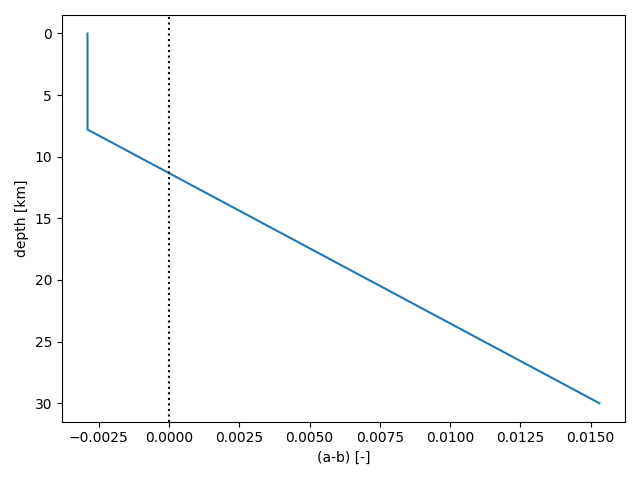

In [3]:
plt.close("all")
plt.clf()
plt.plot(p.mesh_dict["A"] - p.mesh_dict["B"], z * 1e-3)
plt.axvline(0, ls=":", c="k")
plt.ylabel("depth [km]")
plt.xlabel("(a-b) [-]")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

We then run this simulation with `p.run()`

In [4]:
p.run()

 Number of processors =            1
 Start reading input ...
    Mesh input complete
   Flags input complete
 Input complete
 Initializing mesh ...
 1D fault, uniform grid
 Impedance =    5000000.0000000000     
 Intializing kernel: ...
 FFT applied
 Reading kernel /home/qdyn/src/kernel_I.tab
 Kernel intialized
 Values at selected point of the fault:
 K/Kc =   0.29870767338740661     
 K/Kb =   0.12554380475702595     

     it,  dt (secs), time (yrs), v_max (m/s), sigma_max (MPa)
 Initialising RK45 solver
 Finished initialising RK45 solver
 Initialization completed
      0   0.000E+00   0.000E+00   0.111E-08   0.550E+03
    100   0.498E+05   0.157E+00   0.111E-08   0.550E+03
    200   0.503E+05   0.316E+00   0.111E-08   0.550E+03
    300   0.503E+05   0.475E+00   0.111E-08   0.550E+03
    400   0.505E+05   0.635E+00   0.111E-08   0.550E+03
    500   0.507E+05   0.795E+00   0.111E-08   0.550E+03
    600   0.508E+05   0.956E+00   0.111E-08   0.550E+03
    700   0.510E+05   0.112E+01   

  13800   0.376E+03   0.175E+02   0.169E-06   0.550E+03
  13900   0.329E+03   0.175E+02   0.193E-06   0.550E+03
  14000   0.287E+03   0.175E+02   0.221E-06   0.550E+03
  14100   0.250E+03   0.175E+02   0.253E-06   0.550E+03
  14200   0.218E+03   0.175E+02   0.290E-06   0.550E+03
  14300   0.190E+03   0.175E+02   0.332E-06   0.550E+03
  14400   0.166E+03   0.175E+02   0.381E-06   0.550E+03
  14500   0.144E+03   0.175E+02   0.437E-06   0.550E+03
  14600   0.126E+03   0.175E+02   0.502E-06   0.550E+03
  14700   0.109E+03   0.175E+02   0.576E-06   0.550E+03
  14800   0.951E+02   0.175E+02   0.662E-06   0.550E+03
  14900   0.828E+02   0.175E+02   0.760E-06   0.550E+03
  15000   0.720E+02   0.175E+02   0.873E-06   0.550E+03
  15100   0.627E+02   0.175E+02   0.100E-05   0.550E+03
  15200   0.545E+02   0.175E+02   0.115E-05   0.550E+03
  15300   0.474E+02   0.175E+02   0.132E-05   0.550E+03
  15400   0.413E+02   0.175E+02   0.152E-05   0.550E+03
  15500   0.360E+02   0.175E+02   0.174E-05   0.

  28500   0.298E+06   0.192E+02   0.477E-08   0.550E+03
  28600   0.426E+06   0.203E+02   0.346E-08   0.550E+03
  28700   0.568E+06   0.219E+02   0.270E-08   0.550E+03
  28800   0.717E+06   0.239E+02   0.223E-08   0.550E+03
  28900   0.866E+06   0.265E+02   0.192E-08   0.550E+03
  29000   0.101E+07   0.294E+02   0.171E-08   0.550E+03
  29100   0.114E+07   0.328E+02   0.156E-08   0.550E+03
  29200   0.126E+07   0.366E+02   0.145E-08   0.550E+03
  29300   0.128E+07   0.407E+02   0.138E-08   0.550E+03
  29400   0.999E+06   0.442E+02   0.133E-08   0.550E+03
  29500   0.893E+06   0.472E+02   0.129E-08   0.550E+03
  29600   0.809E+06   0.499E+02   0.127E-08   0.550E+03
  29700   0.743E+06   0.523E+02   0.125E-08   0.550E+03
  29800   0.690E+06   0.546E+02   0.123E-08   0.550E+03
  29900   0.646E+06   0.567E+02   0.122E-08   0.550E+03
  30000   0.609E+06   0.587E+02   0.121E-08   0.550E+03
  30100   0.577E+06   0.606E+02   0.120E-08   0.550E+03
  30200   0.549E+06   0.624E+02   0.119E-08   0.

  43200   0.475E+00   0.128E+03   0.615E-03   0.550E+03
  43300   0.252E+00   0.128E+03   0.102E-02   0.550E+03
  43400   0.142E+00   0.128E+03   0.161E-02   0.550E+03
  43500   0.845E-01   0.128E+03   0.243E-02   0.550E+03
  43600   0.532E-01   0.128E+03   0.356E-02   0.550E+03
  43700   0.353E-01   0.128E+03   0.512E-02   0.550E+03
  43800   0.246E-01   0.128E+03   0.729E-02   0.550E+03
  43900   0.180E-01   0.128E+03   0.104E-01   0.550E+03
  44000   0.137E-01   0.128E+03   0.151E-01   0.550E+03
  44100   0.109E-01   0.128E+03   0.226E-01   0.550E+03
  44200   0.906E-02   0.128E+03   0.356E-01   0.550E+03
  44300   0.781E-02   0.128E+03   0.599E-01   0.550E+03
  44400   0.700E-02   0.128E+03   0.108E+00   0.550E+03
  44500   0.649E-02   0.128E+03   0.197E+00   0.550E+03
  44600   0.620E-02   0.128E+03   0.321E+00   0.550E+03
  44700   0.605E-02   0.128E+03   0.418E+00   0.550E+03
  44800   0.513E-02   0.128E+03   0.559E+00   0.550E+03
  44900   0.434E-02   0.128E+03   0.673E+00   0.

  57900   0.144E+06   0.229E+03   0.111E-08   0.550E+03
  58000   0.141E+06   0.229E+03   0.111E-08   0.550E+03
  58100   0.139E+06   0.229E+03   0.111E-08   0.550E+03
  58200   0.136E+06   0.230E+03   0.111E-08   0.550E+03
  58300   0.134E+06   0.230E+03   0.111E-08   0.550E+03
  58400   0.131E+06   0.231E+03   0.111E-08   0.550E+03
  58500   0.128E+06   0.231E+03   0.111E-08   0.550E+03
  58600   0.126E+06   0.232E+03   0.111E-08   0.550E+03
  58700   0.123E+06   0.232E+03   0.111E-08   0.550E+03
  58800   0.121E+06   0.232E+03   0.111E-08   0.550E+03
  58900   0.118E+06   0.233E+03   0.111E-08   0.550E+03
  59000   0.115E+06   0.233E+03   0.111E-08   0.550E+03
  59100   0.113E+06   0.233E+03   0.111E-08   0.550E+03
  59200   0.110E+06   0.234E+03   0.111E-08   0.550E+03
  59300   0.107E+06   0.234E+03   0.111E-08   0.550E+03
  59400   0.105E+06   0.234E+03   0.111E-08   0.550E+03
  59500   0.102E+06   0.235E+03   0.111E-08   0.550E+03
  59600   0.995E+05   0.235E+03   0.111E-08   0.

  72600   0.601E+06   0.284E+03   0.115E-08   0.550E+03
  72700   0.570E+06   0.286E+03   0.115E-08   0.550E+03
  72800   0.544E+06   0.287E+03   0.114E-08   0.550E+03
  72900   0.520E+06   0.289E+03   0.113E-08   0.550E+03
  73000   0.499E+06   0.291E+03   0.113E-08   0.550E+03
  73100   0.479E+06   0.292E+03   0.112E-08   0.550E+03
  73200   0.461E+06   0.294E+03   0.112E-08   0.550E+03
  73300   0.445E+06   0.295E+03   0.112E-08   0.550E+03
  73400   0.430E+06   0.297E+03   0.111E-08   0.550E+03
  73500   0.416E+06   0.298E+03   0.111E-08   0.550E+03
  73600   0.404E+06   0.299E+03   0.111E-08   0.550E+03
 RK45 error [8]: invalid input parameters
  73664   0.318E+06   0.300E+03   0.111E-08   0.550E+03


0

Then read the output:

In [5]:
p.read_output()

True

To get a general impression of how our fault behaved, we plot the time series of the shear stress $\tau$, state $\theta$, and slip rate $v$ recorded at the location where $v$ is maximum.

<IPython.core.display.Javascript object>


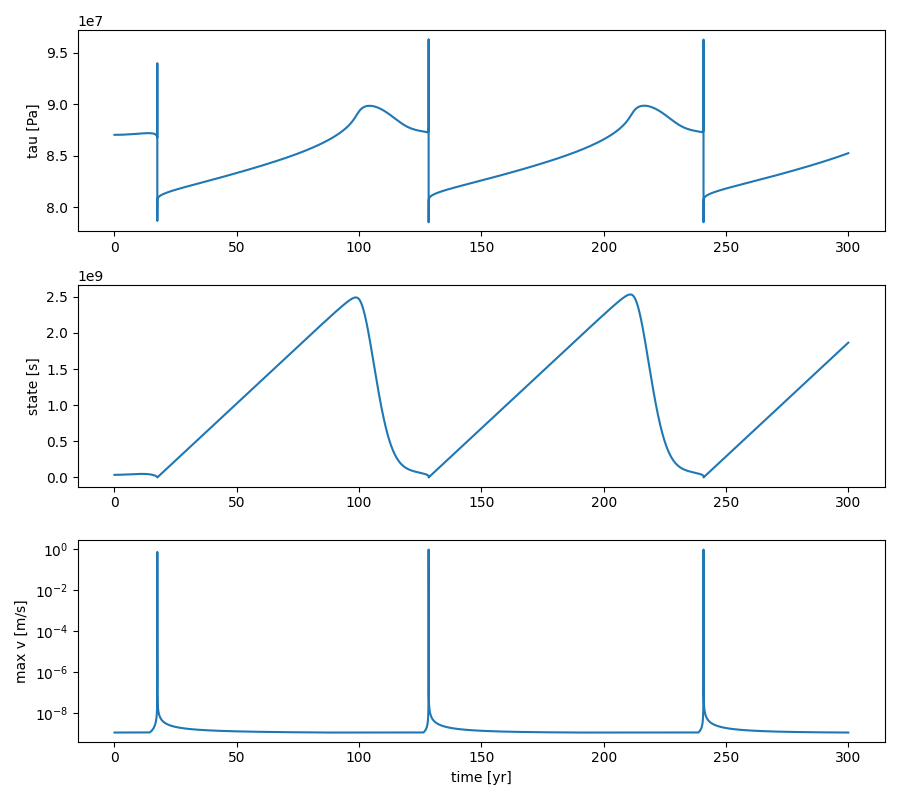

In [8]:
# Time series of stress, state, and maximum slip rate on the fault
qdyn_plot.timeseries(p.ot[0], p.ot_vmax)

In this double-asperity scenario, we see the opposite of what we saw in the single-asperity case: instead of converging to a stable limit cycle, the earthquake cycles diverge into (deterministic) chaos. This is clearly illustrated by the slip rate evolution:

<IPython.core.display.Javascript object>


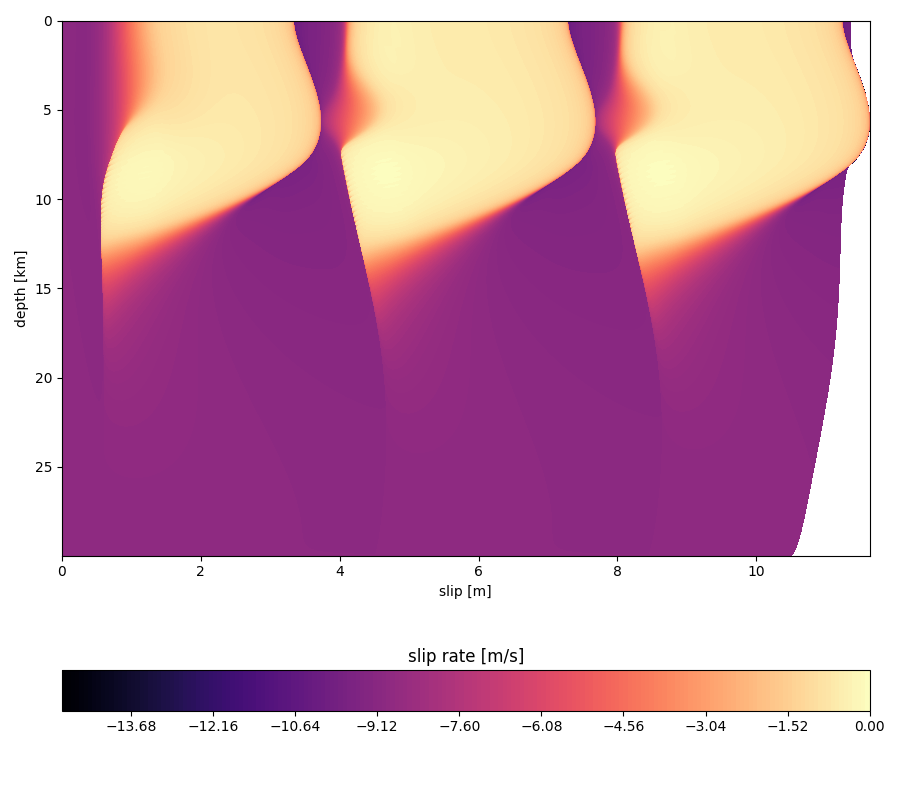

In [9]:
# Spatio-temporal evolution of slip rates
qdyn_plot.slip_profile(p.ox, orientation="vertical")

At first, both asperities rupture simultaneously, but after a few cycles, only the left asperity ruptures seismically while the right one mostly creeps. This pattern is reversed after a few more cycles. Another way of seeing this is with an animation:

In [10]:
# This will take a minute or two...
qdyn_plot.animation_slip(p.ox, orientation="vertical")

## Exercise

In certain regions of the world, like in New Zealand, the geothermal gradient far exceeds values typical for the continental crust (around 25 $^{\circ}$C/km vs. over 100 $^{\circ}$C/km in some regions). We can see the effect of a much steeper geotherm by increasing `dTdz` in the script file. Your mission, should you choose to accept it, is to systematically vary `dTdz` to identify transitions from fast slip to slow slip to creep, and to think about _why_ the mode of slip changes. 